# 1.2 Perceptron
Je n'ai pas reussi le faire marcher, il y a quelque soucis bizarre dans aprentissage. Je passe aux regression logistique

In [3]:
import numpy as np
import pandas as pd
from Module import Lineaire
from losses import MSE, Hinge
from tools import get_patches, pad_to_32
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys
%load_ext autoreload
%autoreload 2

from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

from load_data import get_train_test_loaders

In [17]:
train_loader,test_loader, train_size, test_size = get_train_test_loaders()

In [19]:
torch.cuda.set_device(0)

dim_in = 28*28 + 1
dim_out = 1

epsilon = 0.0001
model = Lineaire(dim_in, dim_out)
model.initialize_parameters()

train_errors = []
test_errors = []

loss = Hinge()

for epoch in range(40):
    if epoch % 10 == 0:
        print("Epoch {}".format(str(epoch)))
    train_error = 0
    for i,(data, y) in enumerate(train_loader):
        model.grad_zero()
        batch_n = data.size()[0]
        X = data.view(batch_n, -1)
        X = torch.cat((torch.ones((batch_n, 1)), X), 1)
        
        y = y.view(batch_n, 1).float()
        
        z1 = model.forward(X)
        yhat = torch.sign(z1)
        train_error += loss.forward(y,yhat).sum()
        
        #import pdb; pdb.set_trace()
        
        delta_Z = loss.backward(y,z1)
        model.backward_update_gradient(X, delta_Z)
        
        model.update_parameters(epsilon)
    train_errors.append(train_error.numpy() / train_size) # mean
    print(train_error)
    
    test_error = 0
    for i,(data, y) in enumerate(test_loader):
        batch_n = data.size()[0]
        X = data.view(batch_n, -1)
        X = torch.cat((torch.ones((batch_n, 1)), X), 1)
        y[y==0] = -1
        y = y.view((batch_n, 1)).float()
                
        yhat = torch.sign(model.forward(X)).float()
        
        test_error += loss.forward(y,yhat).sum()
    test_errors.append(test_error.numpy() / test_size) # mean
    print(test_error)

Epoch 0
tensor(6590.)
tensor(1102.)
tensor(2899.)
tensor(482.)
tensor(1527.)
tensor(300.)
tensor(1030.)
tensor(225.)
tensor(796.)
tensor(172.)
tensor(657.)
tensor(148.)
tensor(571.)
tensor(128.)
tensor(501.)
tensor(112.)
tensor(449.)
tensor(102.)
tensor(417.)
tensor(93.)
Epoch 10
tensor(391.)
tensor(86.)
tensor(369.)
tensor(81.)
tensor(348.)
tensor(77.)
tensor(329.)
tensor(75.)
tensor(297.)
tensor(72.)
tensor(282.)
tensor(66.)
tensor(273.)
tensor(65.)
tensor(257.)
tensor(64.)
tensor(258.)
tensor(63.)
tensor(255.)
tensor(61.)
Epoch 20
tensor(250.)
tensor(60.)
tensor(242.)
tensor(59.)
tensor(232.)
tensor(56.)
tensor(224.)
tensor(54.)
tensor(221.)
tensor(53.)
tensor(214.)
tensor(52.)
tensor(205.)
tensor(50.)
tensor(204.)
tensor(47.)
tensor(201.)
tensor(43.)
tensor(194.)
tensor(43.)
Epoch 30
tensor(194.)
tensor(41.)
tensor(189.)
tensor(40.)
tensor(187.)
tensor(39.)
tensor(185.)
tensor(39.)
tensor(179.)
tensor(38.)
tensor(178.)
tensor(38.)
tensor(174.)
tensor(38.)
tensor(171.)
tensor(36.)
t

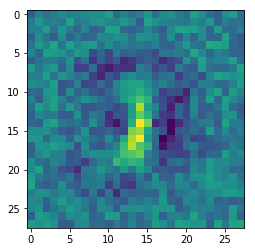

In [23]:
plt.imshow(model.W[0,1:].view(28,28))
#model.W.shape

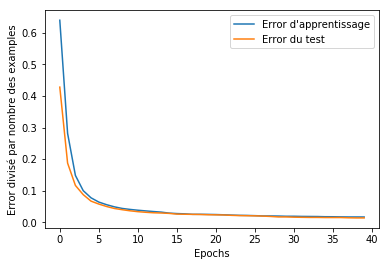

In [24]:
plt.figure()
#plt.ylim([0,0.01])
plt.plot(range(len(train_errors)), train_errors, label="Error d'apprentissage")
plt.plot(range(len(test_errors)), test_errors, label="Error du test")
plt.xlabel('Epochs')
plt.ylabel('Error divisé par nombre des examples')
plt.legend()

In [26]:
correct = 0
bad_classified_zero = []
bad_classified_one = []
for i,(data, y) in enumerate(test_loader):
        batch_n = data.size()[0]
        batch_n = data.size()[0]
        X = data.view(batch_n, -1)
        X = torch.cat((torch.ones((batch_n, 1)), X), 1)
        #import pdb; pdb.set_trace()
        
        #y[y==0] = -1
        y = y.view((batch_n, 1)).float()
                
        yhat = torch.sign(model.forward(X)).float()
        
        correct += (y == yhat).sum()

        bad_clf_0 = ((y != yhat) * (y == 1))
        bad_clf_1 = ((y != yhat) * (y == -1))
        
        for img0 in data[bad_clf_0]:
            bad_classified_zero.append(img0)
        for img1 in data[bad_clf_1]:
            bad_classified_one.append(img1)

print(correct.float() / test_size)

tensor(0.9864)


torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


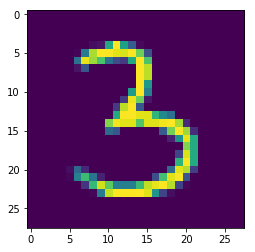

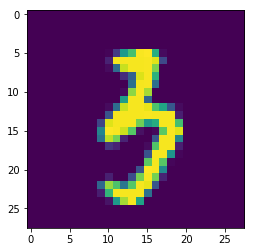

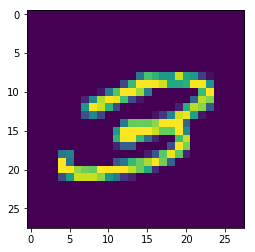

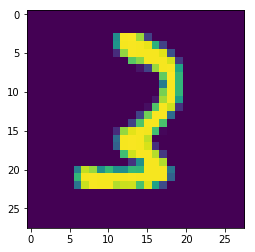

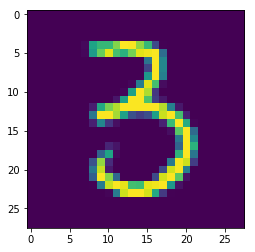

In [14]:
for image in bad_classified_one[:5]:
    print(image.shape)
    plt.figure()
    plt.imshow(image)